<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/telecommunications_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [22]:
df = pd.read_csv("/content/telecommunications_churn.csv")


In [23]:
df.head().style.background_gradient(cmap = "summer")

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.100000,197.400000,244.700000,10.000000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000,0
1,107,1,26,161.600000,195.500000,254.400000,13.700000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000,0
2,137,0,0,243.400000,121.200000,162.600000,12.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000,0
3,84,0,0,299.400000,61.900000,196.900000,6.600000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000,0
4,75,0,0,166.700000,148.300000,186.900000,10.100000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000,0


In [24]:
df.shape

(3333, 19)

Data Processing


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

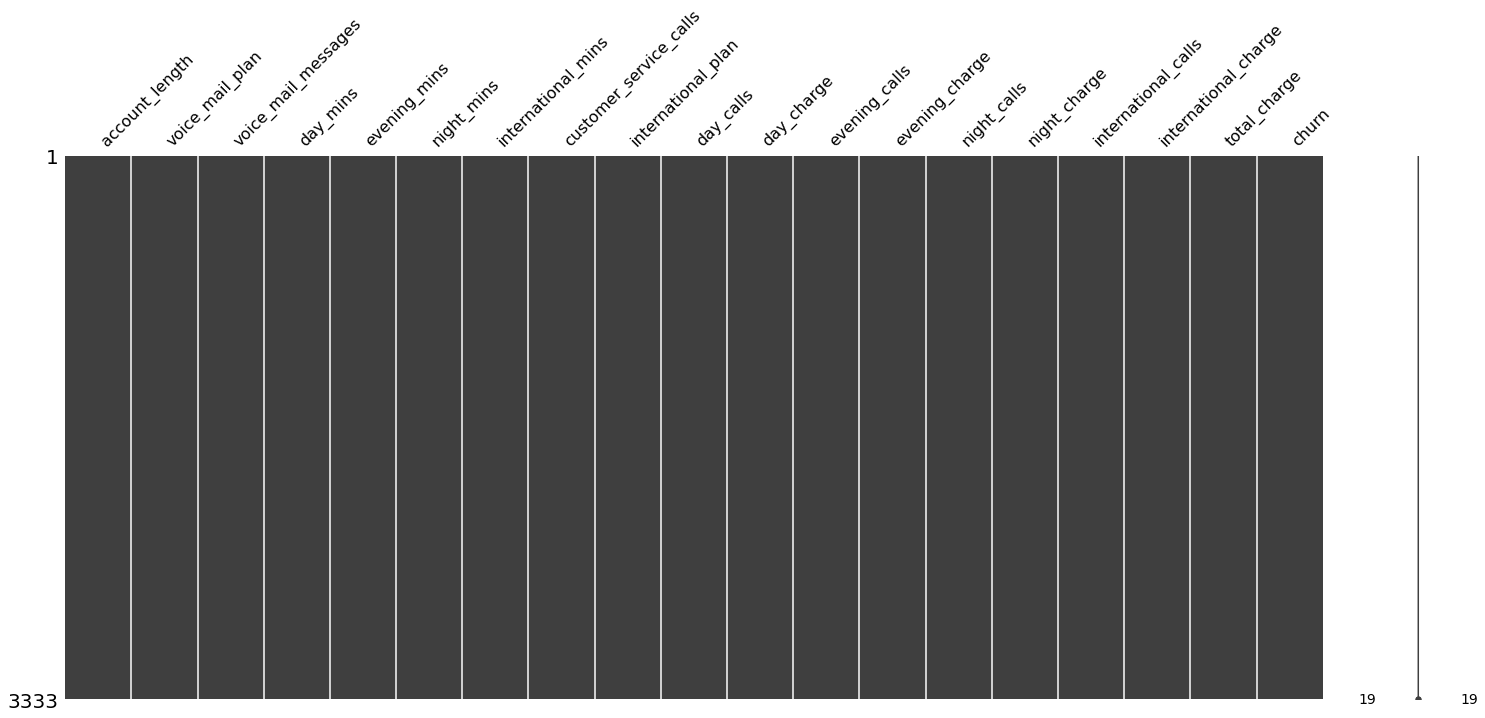

In [26]:
import missingno as msno
msno.matrix(df);

<Figure size 720x360 with 0 Axes>

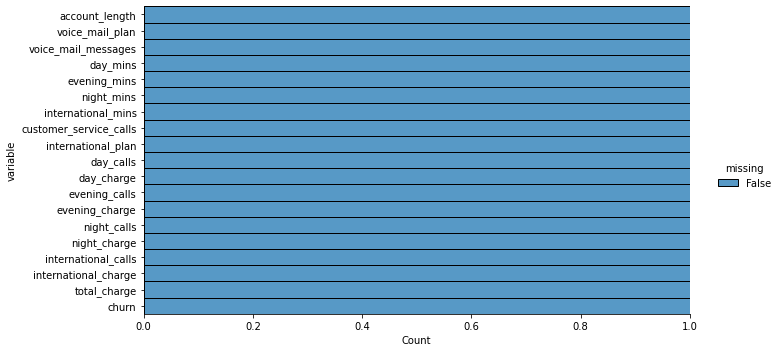

In [27]:
# visualize missing values with seaborn (distplot)

plt.figure(figsize = (10, 5))
sns.displot(
    data = df.isna().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 2
);

In [28]:
df.describe().T.style.background_gradient(cmap = "summer")

,count,mean,std,min,25%,50%,75%,max
account_length,3333.000000,101.064806,39.822106,1.000000,74.000000,101.000000,127.000000,243.000000
voice_mail_plan,3333.000000,0.276628,0.447398,0.000000,0.000000,0.000000,1.000000,1.000000
voice_mail_messages,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
day_mins,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
evening_mins,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
night_mins,3333.000000,200.872037,50.573847,23.200000,167.000000,201.200000,235.300000,395.000000
international_mins,3333.000000,10.237294,2.791840,0.000000,8.500000,10.300000,12.100000,20.000000
customer_service_calls,3333.000000,1.562856,1.315491,0.000000,1.000000,1.000000,2.000000,9.000000
international_plan,3333.000000,0.096910,0.295879,0.000000,0.000000,0.000000,0.000000,1.000000
day_calls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000


In [29]:
df.corr().style.background_gradient(cmap = "copper")

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,0.001454,0.016541
voice_mail_plan,0.002918,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,0.008585,-0.102148
voice_mail_messages,-0.004628,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.009766,-0.089728
day_mins,0.006216,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,0.884754,0.205151
evening_mins,-0.006757,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.413143,0.092796
night_mins,-0.008955,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.214257,0.035493
international_mins,0.009514,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,0.054988,0.068239
customer_service_calls,-0.003796,-0.017824,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.019873,0.208750
international_plan,0.024735,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048415,0.259852
day_calls,0.038470,-0.011086,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,0.003673,0.018459


Box Plot


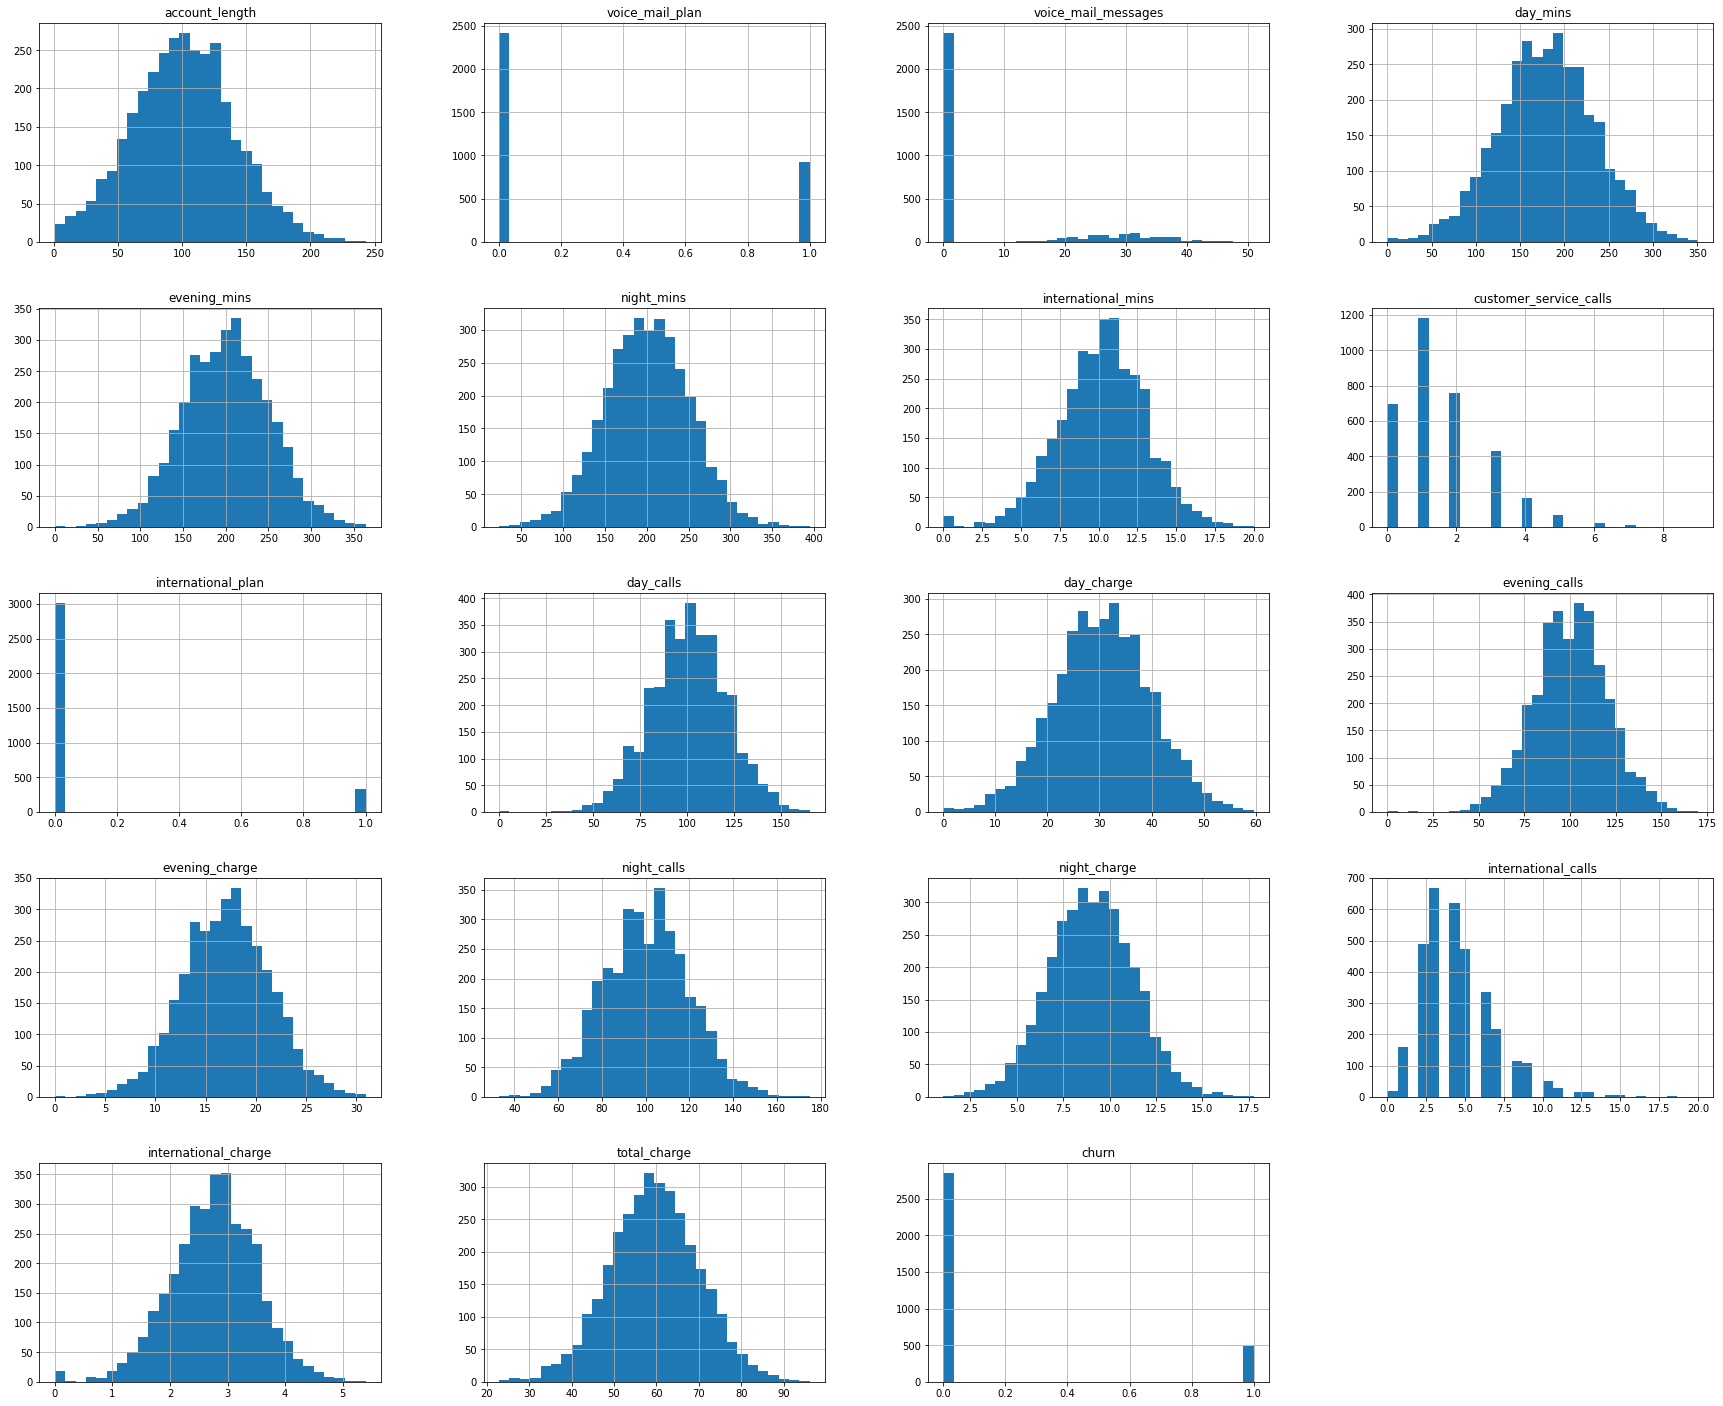

In [33]:
df.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

In [46]:
import plotly.express as px
fig = px.histogram(df, x = "total_charge",
                   y = "account_length",
                   marginal = None, text_auto = True,
                   color = "churn", hover_data  = df.columns, width = 850, height = 500)
fig.show()

In [47]:
fig = px.histogram(df, x = "voice_mail_messages",
                   y = "total_charge",
                   marginal = None, text_auto = True,
                   color = "churn", hover_data  = df.columns, width = 850, height = 500)
fig.show()

will voice mail msg is Influance over model thats why we have to feature scalling before building Model

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# define standard scaler
scaler = StandardScaler()

In [51]:
# transform data
df = scaler.fit_transform(df)
print(df)

[[ 0.67648946  1.6170861   1.23488274 ... -0.0856905   1.53420904
  -0.41167182]
 [ 0.14906505  1.6170861   1.30794844 ...  1.2411686  -0.01997527
  -0.41167182]
 [ 0.9025285  -0.61839626 -0.59175986 ...  0.69715637  0.27048197
  -0.41167182]
 ...
 [-1.83505538 -0.61839626 -0.59175986 ...  1.3871231   0.78949572
  -0.41167182]
 [ 2.08295458 -0.61839626 -0.59175986 ... -1.87695028 -0.18282178
  -0.41167182]
 [-0.67974475  1.6170861   1.23488274 ...  1.2411686   1.67229526
  -0.41167182]]
